# Argo Box Slides

This notebook will make a few combined plots for the Argo slides presentation, all the individual notebooks for boxes in this analysis are named argo_box#. In particular, the areas compared here will be:
- box 1: ACC, low EKE
- box 2: ACC, high EKE
- box 3: Mediterranean outflow

In [1]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from cmocean import cm as cmo
import xrft
import pandas as pd


import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import MLD_funcs as mf

In [2]:
reload(df)
reload(ef)
reload(ff)
reload(pf)
reload(mf)

<module 'MLD_funcs' from '/home.ufs/amf2288/argo-intern/MLD_funcs.py'>

In [6]:
box1 = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-40,-30)_ds_z.nc')
box2 = xr.open_dataset('202206_boxes/lon:(-55,-45)_lat:(-45,-35)_ds_z.nc')
box3 = xr.open_dataset('202206_boxes/lon:(-40,-30)_lat:(20,30)_ds_z.nc')

In [7]:
box1 = mf.get_MLD(box1)
box1 = mf.add_times(box1)

box2 = mf.get_MLD(box2)
box2 = mf.add_times(box2)

box3 = mf.get_MLD(box3)
box3 = mf.add_times(box3)

## Plot Spectra

In [8]:
SIG0_spec1  = xrft.power_spectrum(box1.SIG0.mean('N_PROF'), dim='PRES_INTERPOLATED',window='hamming')
SPICE_spec1 = xrft.power_spectrum(box1.SPICE.mean('N_PROF'),dim='PRES_INTERPOLATED',window='hamming')

SIG0_spec2  = xrft.power_spectrum(box2.SIG0.mean('N_PROF'), dim='PRES_INTERPOLATED',window='hamming')
SPICE_spec2 = xrft.power_spectrum(box2.SPICE.mean('N_PROF'),dim='PRES_INTERPOLATED',window='hamming')

SIG0_spec3  = xrft.power_spectrum(box3.SIG0.mean('N_PROF'), dim='PRES_INTERPOLATED',window='hamming')
SPICE_spec3 = xrft.power_spectrum(box3.SPICE.mean('N_PROF'),dim='PRES_INTERPOLATED',window='hamming')

SIG0_m  = SIG0_spec1.freq_PRES_INTERPOLATED
SPICE_m = SPICE_spec1.freq_PRES_INTERPOLATED

Text(0.5, 1.0, 'Spice Spectra')

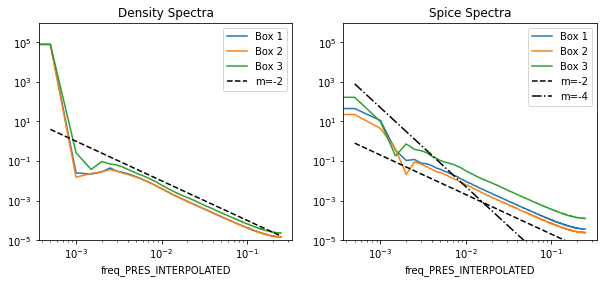

In [32]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
SIG0_spec1.plot(label='Box 1')
SIG0_spec2.plot(label='Box 2')
SIG0_spec3.plot(label='Box 3')
plt.plot(SIG0_m, 1e-6*SIG0_m**-2,'--',color='k',label='m=-2')
plt.legend()
plt.ylim(1e-5, 1e6)
plt.xscale('log')
plt.yscale('log')
plt.title('Density Spectra')


plt.subplot(1,2,2)
SPICE_spec1.plot(label='Box 1')
SPICE_spec2.plot(label='Box 2')
SPICE_spec3.plot(label='Box 3')
plt.plot(SPICE_m, 2e-7*SPICE_m**(-2),'--',color='k',label='m=-2')
plt.plot(SPICE_m, 5e-11*SPICE_m**(-4),'-.', color='k',label='m=-4')
plt.legend()
plt.ylim(1e-5, 1e6)
plt.xscale('log')
plt.yscale('log')
plt.title('Spice Spectra')